# 商务大数据课程设计 —— Indeed 员工评论文本分析
***
## 主要包括（词云、LDA、情感极性分布）三个部分

In [177]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.dates as mdates    #处理日期
import matplotlib.pyplot as plt
from tqdm import tqdm

from collections import Counter
import time
import datetime
import math


In [3]:
# matplotlib.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
# plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

**加载数据**

In [4]:
data = pd.read_csv('indeed_really_1900_processed.csv')
data = data.dropna(subset=['text', 'cons', 'pros', 'job_title'])

In [5]:
data.columns

Index(['index', 'company_id', 'overall_rating', 'compensation_benefits_rating',
       'culture_value_rating', 'jobSecurity_advancement_rating',
       'management_rating', 'work_life_balance_rating', 'is_currentEmployee',
       'helpful', 'unhelpful', 'job_title', 'location',
       'job_title_filter_link', 'redacted', 'title', 'cons', 'pros', 'text',
       'submission_date', 'tweet_auto_fill_text', 'month', 'year', 'day',
       'date', 'days', 'weeks', 'months', 'years'],
      dtype='object')

***
## 一、wordCloud 词云图

In [196]:
def process_sentencce_tokenizer(sentence: str):
    sentence = sentence.lower()
    remove_chars = '[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    sentence = re.sub(remove_chars, ' ', sentence)

    words = nltk.word_tokenize(sentence)
    # words = [word for word in words if word not in stopwords.words('english')]
    # words = normalize(words)
    # stems, lemmas = stem_and_lemmatize(words)
    # lemmas = lemmatize_verbs(words)
    return words


def words_cloud(comments, path='wordCloud.png', title='词云图'):
    # pass
    wcd = WordCloud(
                    background_color='gray',
                    repeat=False,
                    max_words=300,
                    height=500,
                    width=800,
                    mask=None,
                    max_font_size=80,
                    min_font_size=12,
                    colormap='Reds',
                    mode='RGBA'
    )
    comments = ' '.join(comments)
    comments = comments.lower()
    ss = ' '.join(nltk.word_tokenize(comments))
    wcd.generate(ss)
    wcd.to_image()
    plt.figure(figsize=(8,5))
    plt.imshow(wcd, interpolation="bilinear")
    plt.axis("off")
    
    plt.title('     ' + title + '      ', fontsize=18, color='black', weight='bold')
    plt.show()
    wcd.to_file(path)
    print('+++++ 词云已经生成完毕 +++++')
    return wcd


def word_frequence(texts, most_common=100):
    stop_words = [line.strip() for line in open('stopwords\哈工大停用词表.txt', 'r', encoding='utf-8').readlines()]
    c = Counter()
    for text in texts:
        cuted_text = jieba.posseg.cut(text)  # 带词性的分词
        for word, pos in cuted_text:
            if word not in stop_words and (pos.startswith('v') or pos.startswith('n')):
                c[word] += 1
    common_words = c.most_common(most_common)
    for common_tuple in common_words:
        print('s', common_tuple[0], 's', ' ', common_tuple[1], ' ', common_tuple[1]/len(texts))
    return common_words


def sentiment_analyse(texts):
    # 使用nltk.sentiment.vader中的SentimentIntensityAnalyzer做情感极性分析
    # sentiment处于 [-1, 1]，接近0表示中性，越接近1表示情绪越积极
    sid = SentimentIntensityAnalyzer()
    sentiments = []
    for text in texts:
        sentiments.append(sid.polarity_scores(text)['compound'])
    return sentiments


***
**首先，我们来探究所有员工评论中，大家都在谈论什么**

In [431]:
plt.style.use('ggplot')

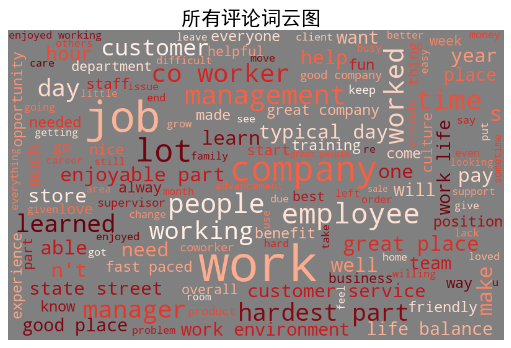

+++++ 词云已经生成完毕 +++++


In [184]:
title = '所有评论词云图'
word_cloud_all = words_cloud(data['text'], 'wordCloud_text_all.png', title)

**其次，我们分别对评分为1、2、3、4、5的评分单独可视化**

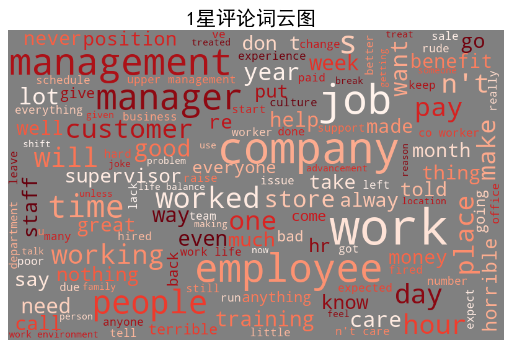

+++++ 词云已经生成完毕 +++++


In [185]:
title = '1星评论词云图'
word_cloud_rating_1 = words_cloud(
    data.loc[data['overall_rating']==1]['text'], 'wordCloud_1.png', title)

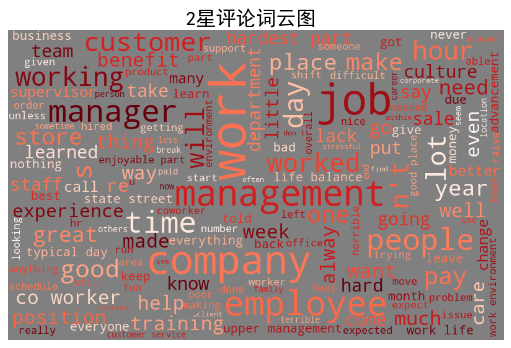

+++++ 词云已经生成完毕 +++++


In [186]:
title = '2星评论词云图'
word_cloud_rating_2 = words_cloud(
    data.loc[data['overall_rating']==2]['text'], 'wordCloud_2.png', title)

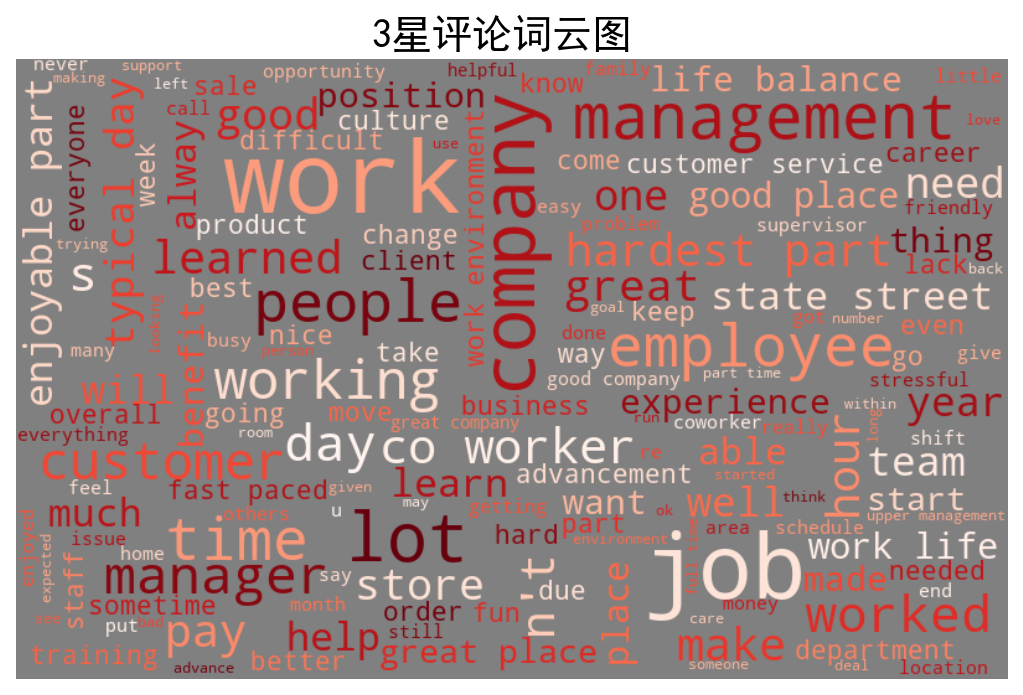

+++++ 词云已经生成完毕 +++++


In [436]:
title = '3星评论词云图'
word_cloud_rating_3 = words_cloud(
    data.loc[data['overall_rating']==3]['text'], 'wordCloud_3.png', title)

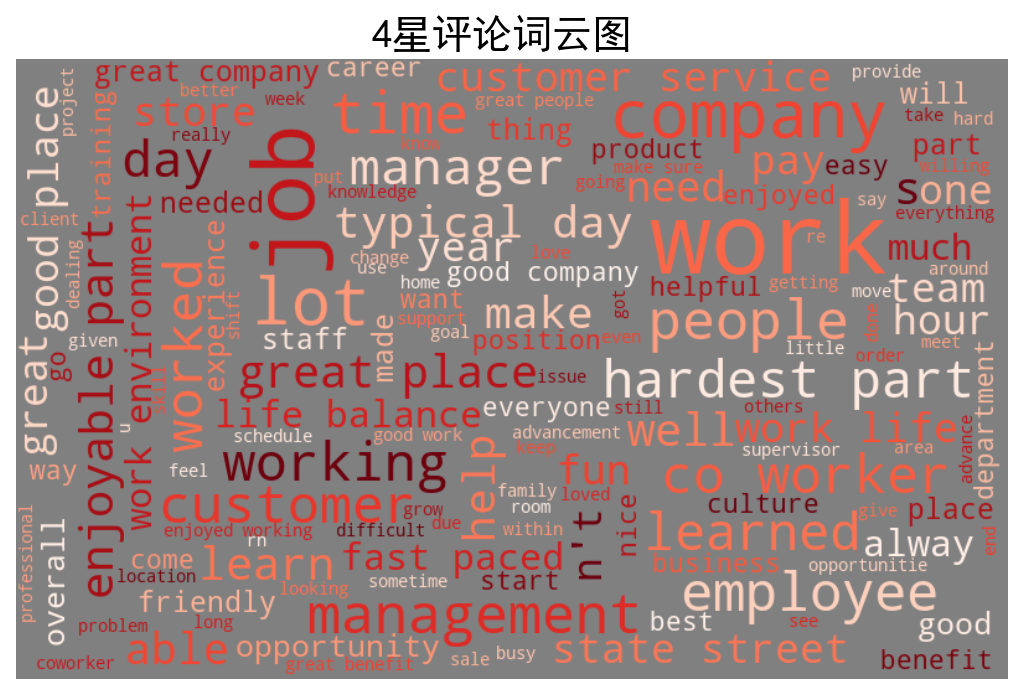

+++++ 词云已经生成完毕 +++++


In [437]:
title = '4星评论词云图'
word_cloud_rating_4 = words_cloud(
    data.loc[data['overall_rating']==4]['text'], 'wordCloud_4.png', title)

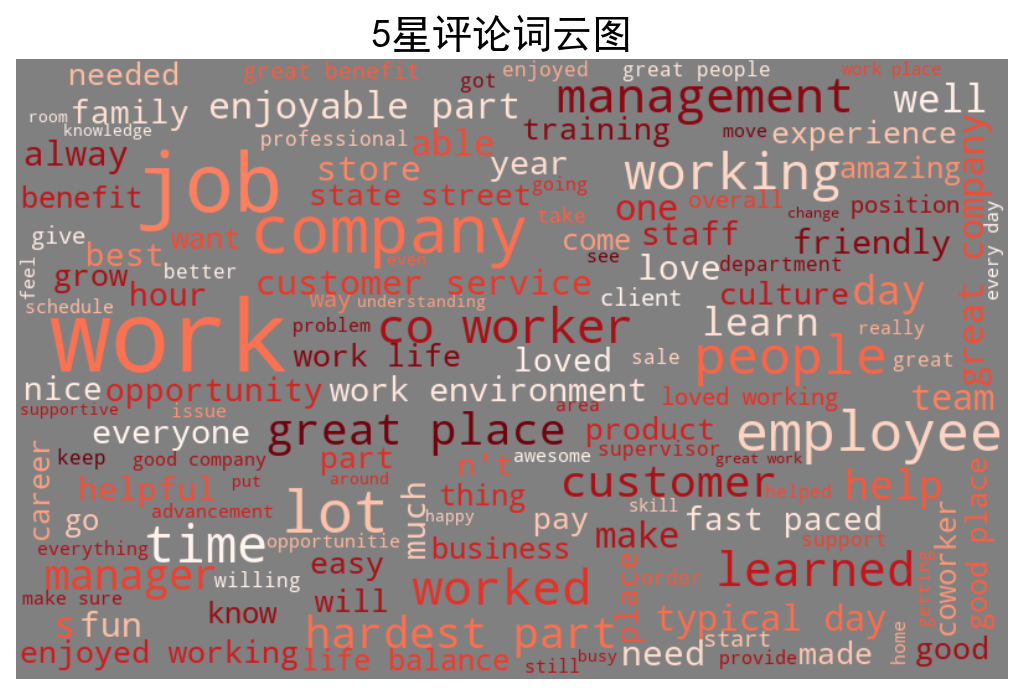

+++++ 词云已经生成完毕 +++++


In [438]:
title = '5星评论词云图'
word_cloud_rating_5 = words_cloud(
    data.loc[data['overall_rating']==5]['text'], 'wordCloud_5.png', title)

***
**随后，除了评论文本本身，还对用户提到的优缺点进行了词云可视化**

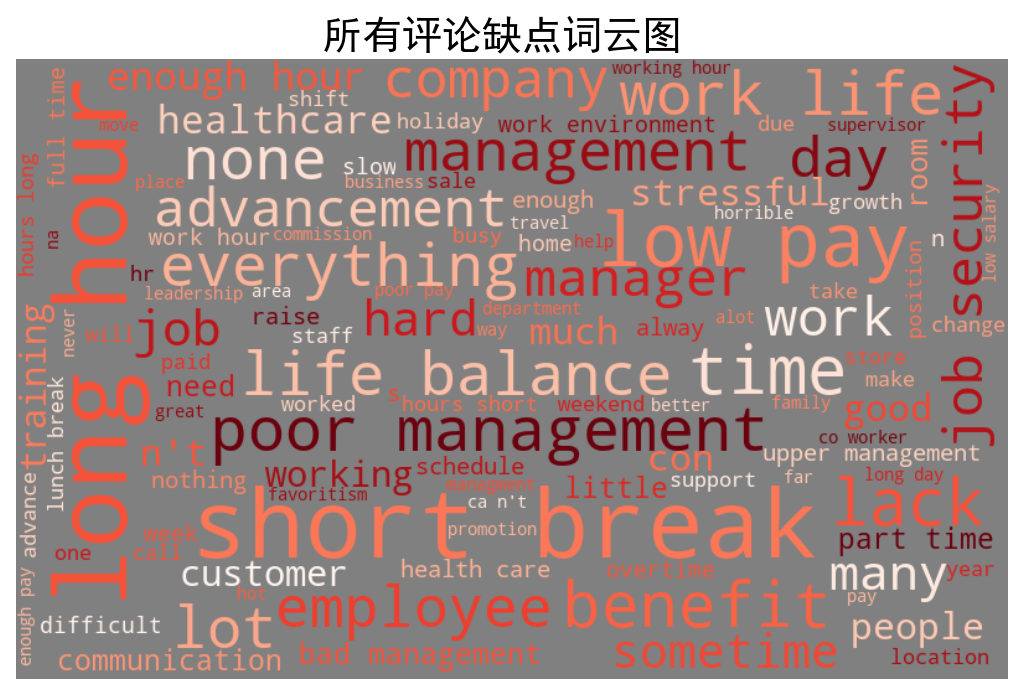

+++++ 词云已经生成完毕 +++++


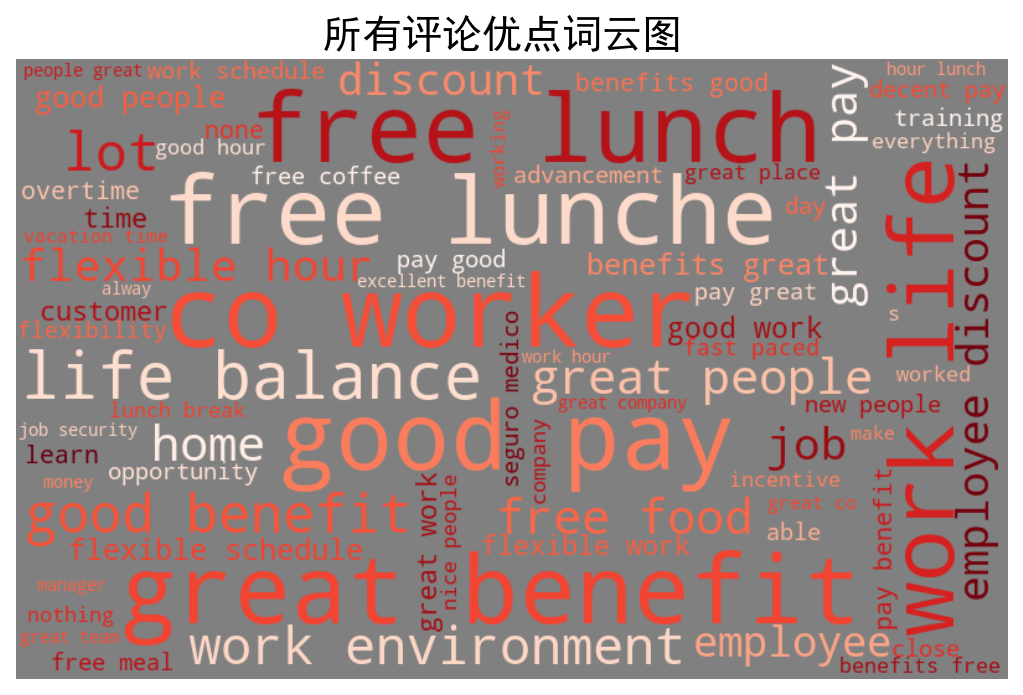

+++++ 词云已经生成完毕 +++++


In [444]:
title_cons = '所有评论缺点词云图'
title_pros = '所有评论优点词云图'

word_cloud_cons = words_cloud(
    data.loc[data['cons']!='MISS']['cons'], 'wordCloud_cons.png', title_cons)
word_cloud_pros = words_cloud(
    data.loc[data['pros']!='MISS']['pros'], 'wordCloud_pros.png', title_pros)

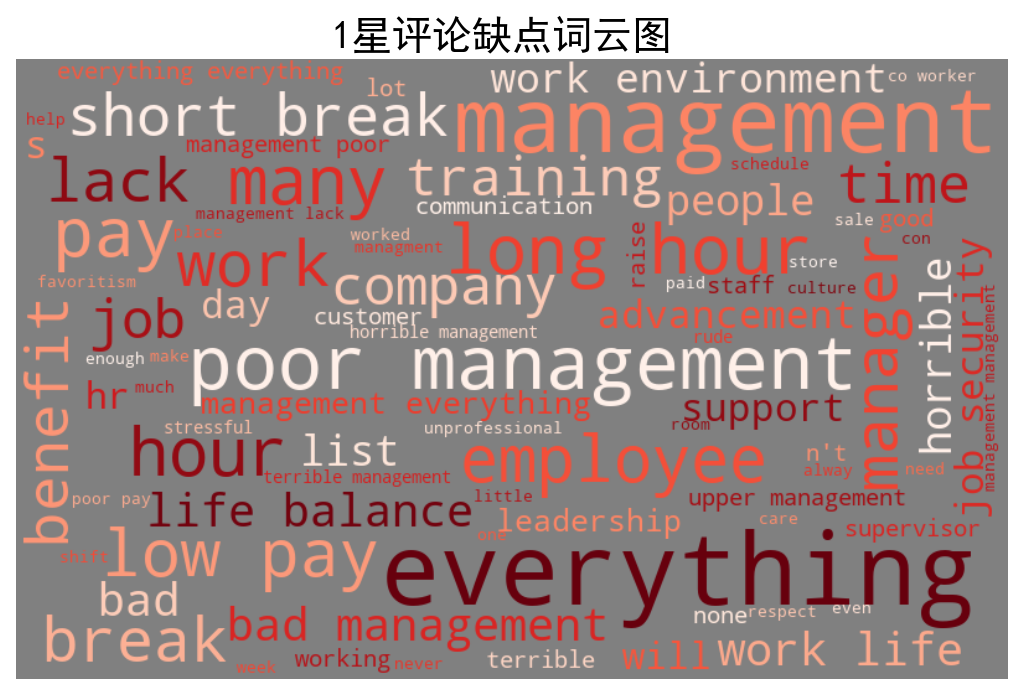

+++++ 词云已经生成完毕 +++++


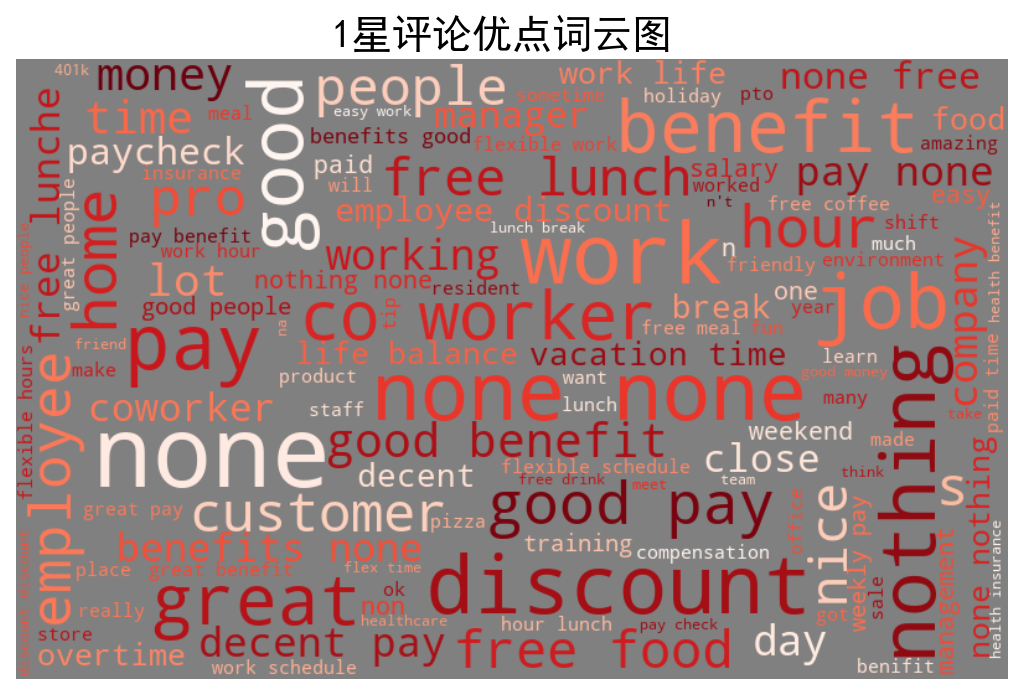

+++++ 词云已经生成完毕 +++++


In [439]:
title_cons = '1星评论缺点词云图'
title_pros = '1星评论优点词云图'

word_cloud_cons_1 = words_cloud(
    data.loc[(data['cons']!='MISS') & (data['overall_rating']==1)]['cons'], 'wordCloud_cons_1.png', title_cons)
word_cloud_pros_1 = words_cloud(
    data.loc[(data['pros']!='MISS') & (data['overall_rating']==1)]['pros'], 'wordCloud_pros_1.png', title_pros)

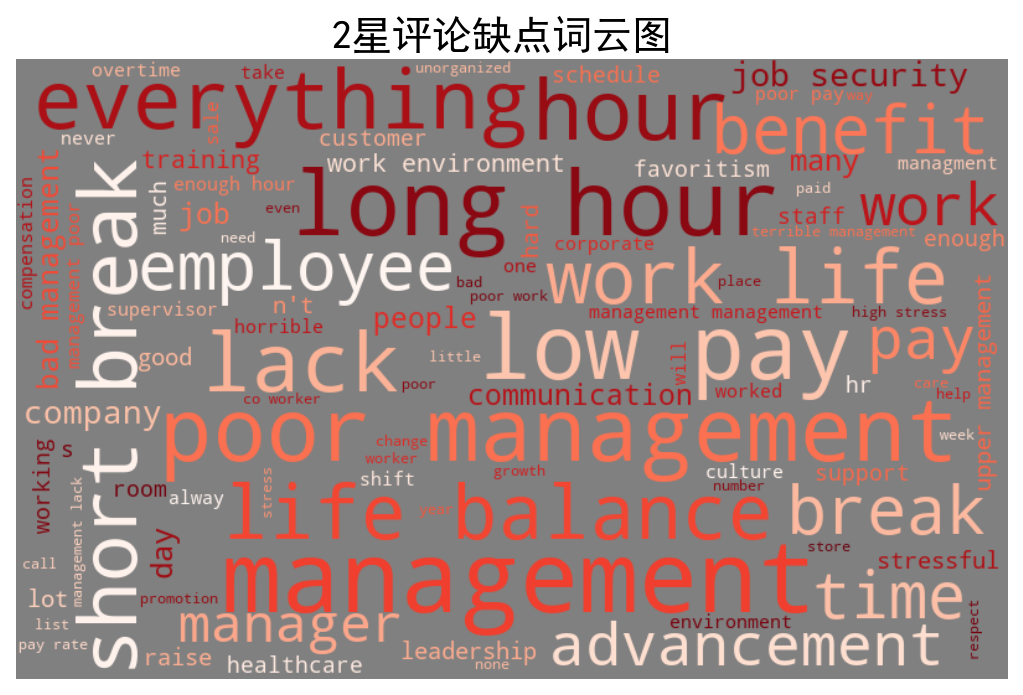

+++++ 词云已经生成完毕 +++++


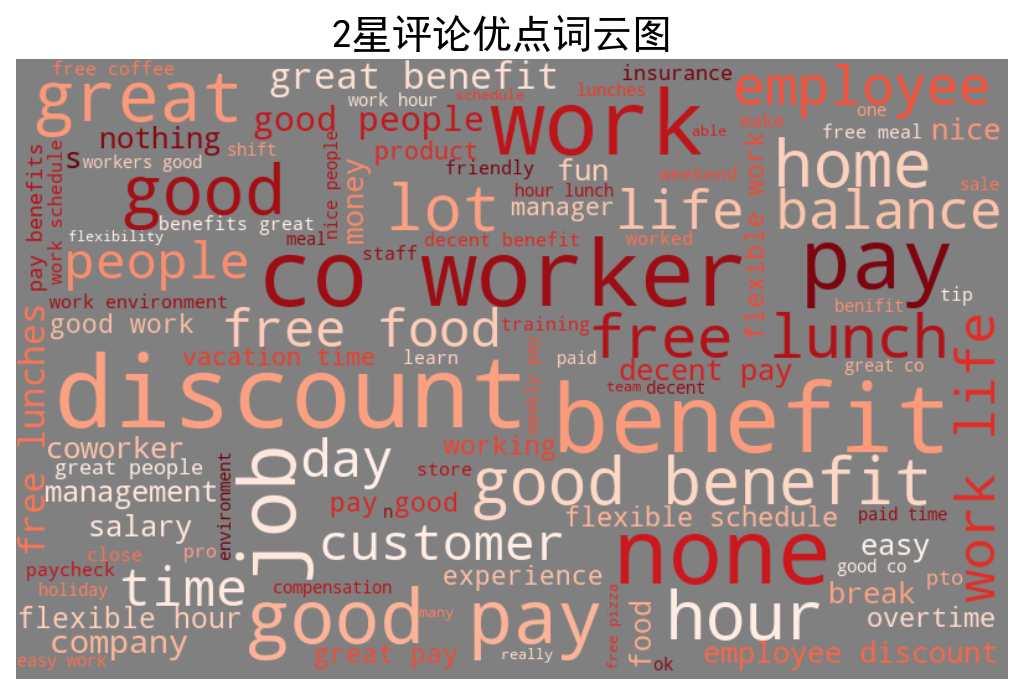

+++++ 词云已经生成完毕 +++++


In [440]:
title_cons = '2星评论缺点词云图'
title_pros = '2星评论优点词云图'

word_cloud_cons_2 = words_cloud(
    data.loc[(data['cons']!='MISS') & (data['overall_rating']==2)]['cons'], 'wordCloud_cons_2.png', title_cons)
word_cloud_pros_2 = words_cloud(
    data.loc[(data['pros']!='MISS') & (data['overall_rating']==2)]['pros'], 'wordCloud_pros_2.png', title_pros)

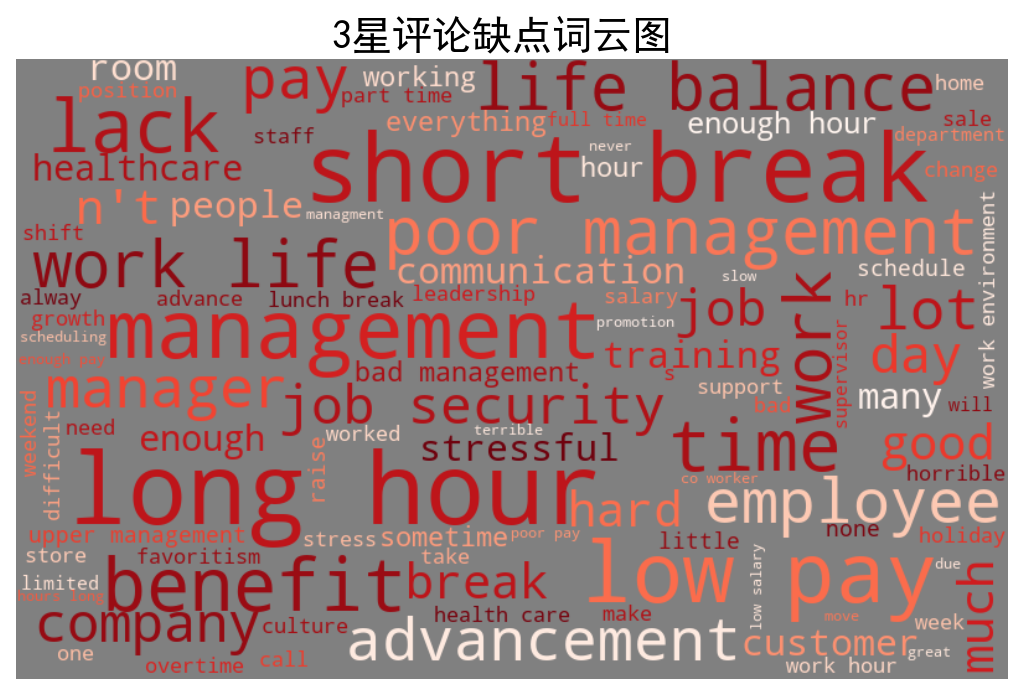

+++++ 词云已经生成完毕 +++++


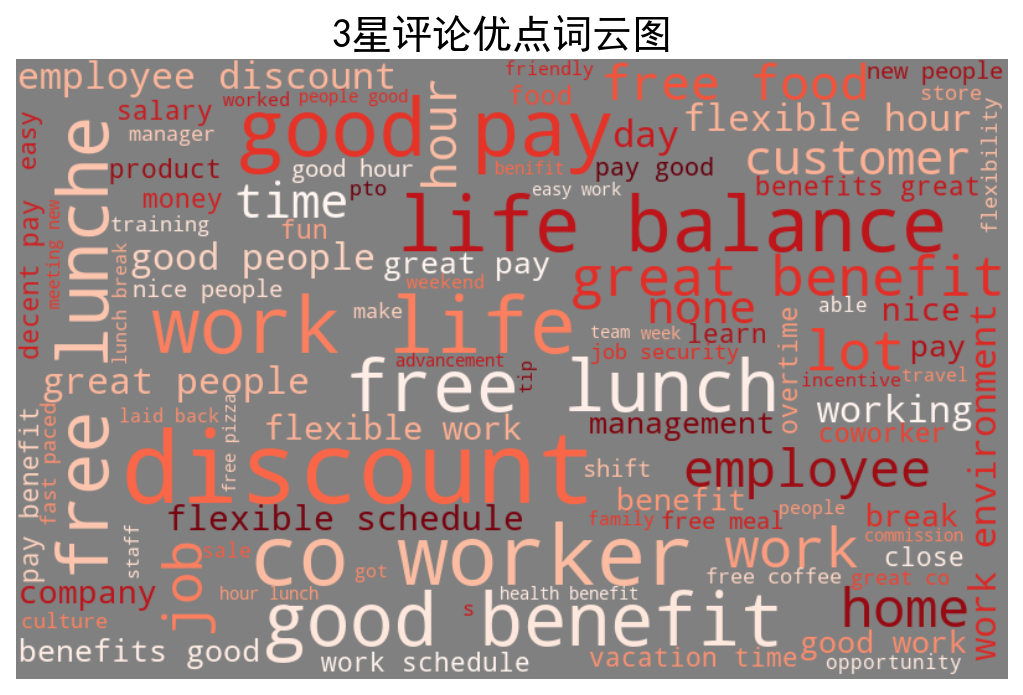

+++++ 词云已经生成完毕 +++++


In [441]:
title_cons = '3星评论缺点词云图'
title_pros = '3星评论优点词云图'

word_cloud_cons_3 = words_cloud(
    data.loc[(data['cons']!='MISS') & (data['overall_rating']==3)]['cons'], 'wordCloud_cons_3.png', title_cons)
word_cloud_pros_3 = words_cloud(
    data.loc[(data['pros']!='MISS') & (data['overall_rating']==3)]['pros'], 'wordCloud_pros_3.png', title_pros)

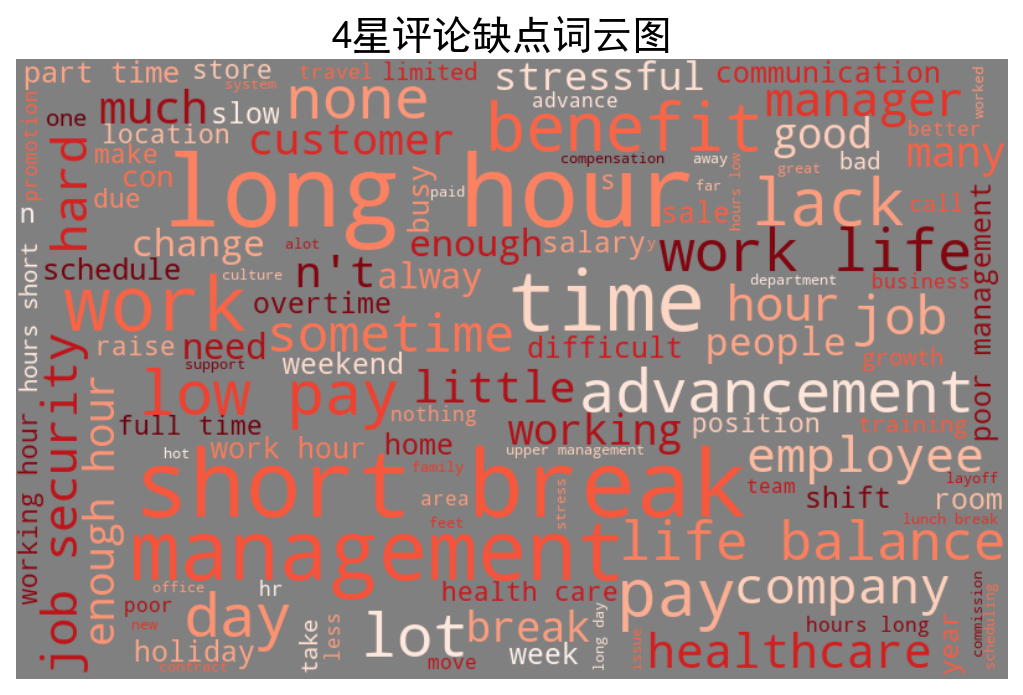

+++++ 词云已经生成完毕 +++++


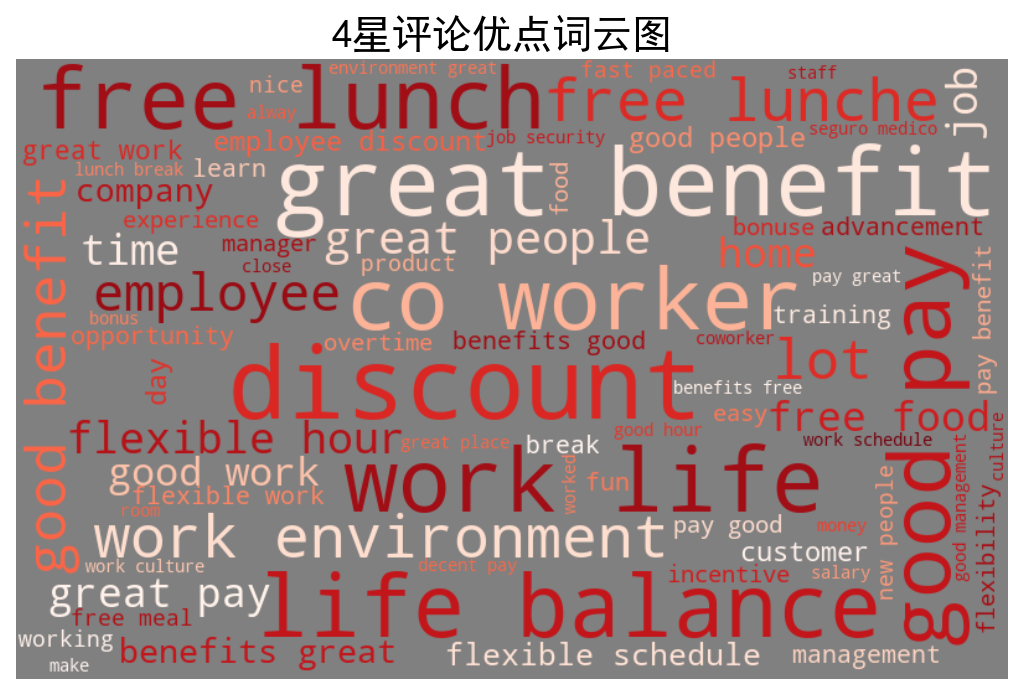

+++++ 词云已经生成完毕 +++++


In [442]:
title_cons = '4星评论缺点词云图'
title_pros = '4星评论优点词云图'

word_cloud_cons_4 = words_cloud(
    data.loc[(data['cons']!='MISS') & (data['overall_rating']==4)]['cons'], 'wordCloud_cons_4.png', title_cons)
word_cloud_pros_4 = words_cloud(
    data.loc[(data['pros']!='MISS') & (data['overall_rating']==4)]['pros'], 'wordCloud_pros_4.png', title_pros)

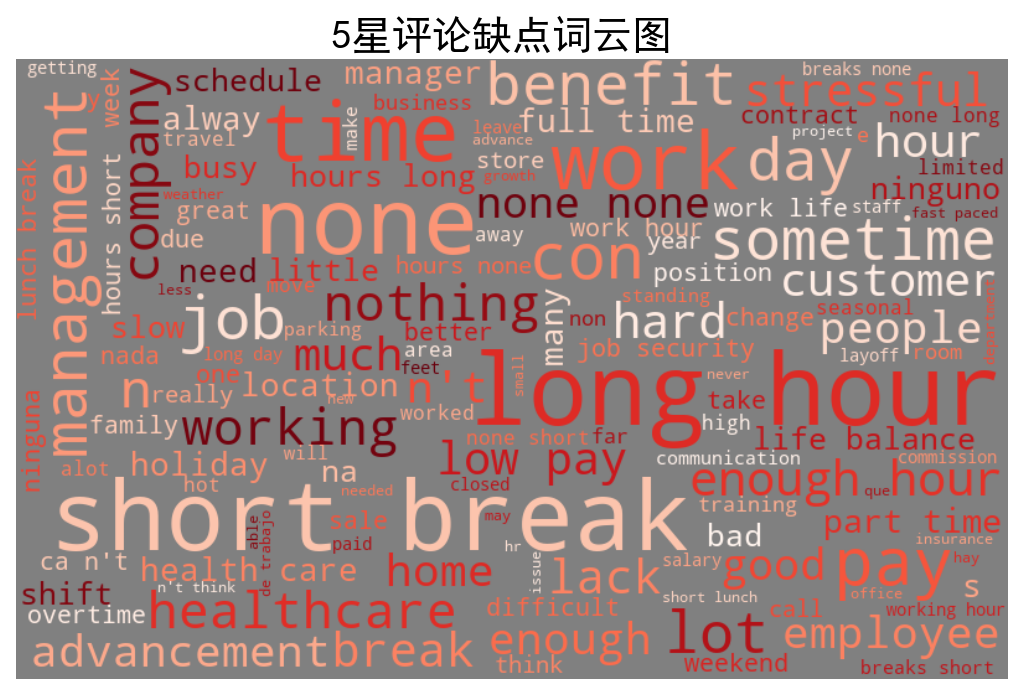

+++++ 词云已经生成完毕 +++++


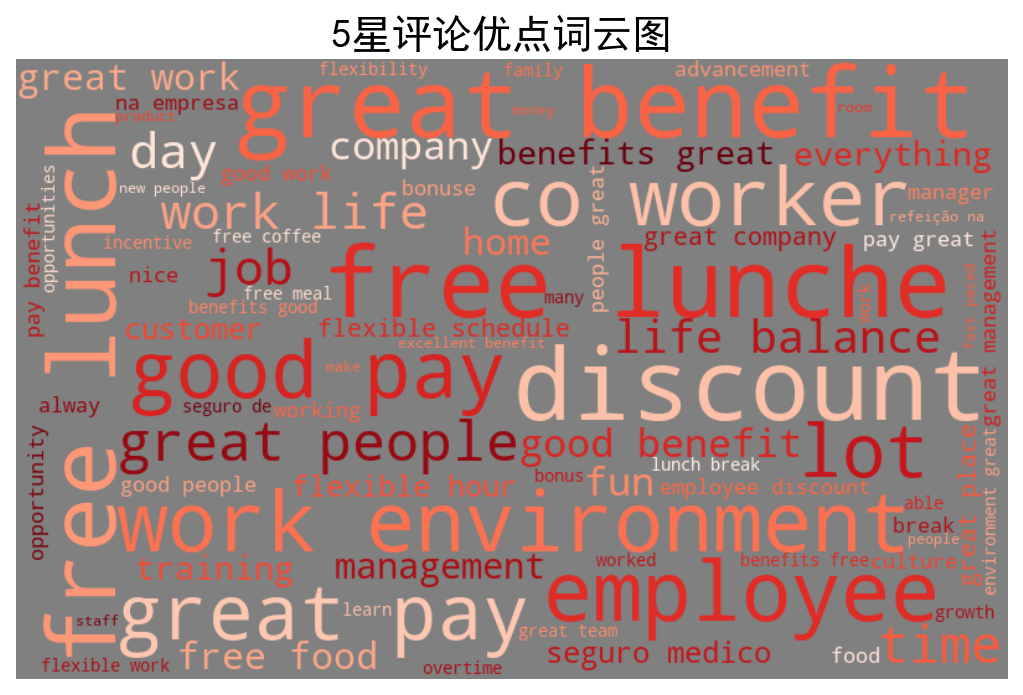

+++++ 词云已经生成完毕 +++++


In [443]:
title_cons = '5星评论缺点词云图'
title_pros = '5星评论优点词云图'

word_cloud_cons_5 = words_cloud(data.loc[(data['cons']!='MISS') & (data['overall_rating']==5)]['cons'], 'wordCloud_cons_5.png', title_cons)
word_cloud_pros_5 = words_cloud(data.loc[(data['pros']!='MISS') & (data['overall_rating']==5)]['pros'], 'wordCloud_pros_5.png', title_pros)

***
## 二、LDA
**主题模型，无监督对文档进行主题建模，将所有评论划分为N种(N可手动设置)主题，每个主题具有不同的词组集合（比如某些评论属于食物主题，另一些评论属于薪资主题）**

In [6]:
# 矢量化文本
from sklearn.feature_extraction.text import CountVectorizer
# 相关模型
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
# 可视化高维数据集
from sklearn.manifold import TSNE
from nltk.stem.wordnet import WordNetLemmatizer
import string
# 使用新的数据类型
from collections import Counter

# 停用词
from nltk.corpus import stopwords


**对评论文本进行预处理（包括将所有字母转为小写，词干化等）**

In [7]:
stop_words = stopwords.words('english')
stop = set(stop_words)
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = " ".join([i for i in text.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

text_clean = [clean(text) for text in data.loc[:200000]['text']]

**得到计数词袋模型，并将文本转为词袋模型的稀疏矩阵表示**

In [8]:
countVectorizer = CountVectorizer(stop_words=stop_words, min_df=2, max_features=5000)
vectorizedText = countVectorizer.fit_transform(text_clean)
print('Shape Vectorized Text: {}'.format(vectorizedText.shape))

Shape Vectorized Text: (199417, 5000)


**训练LDA， 设定主题数为10**

In [9]:
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, 
                                learning_offset=50, 
                                learning_method='online',
                                random_state=0, 
                                n_jobs=12, 
                                max_iter=80)
#训练LDA模型，得到聚类结果
lda_result = lda.fit_transform(vectorizedText)
topics = np.argmax(lda_result,axis=1)

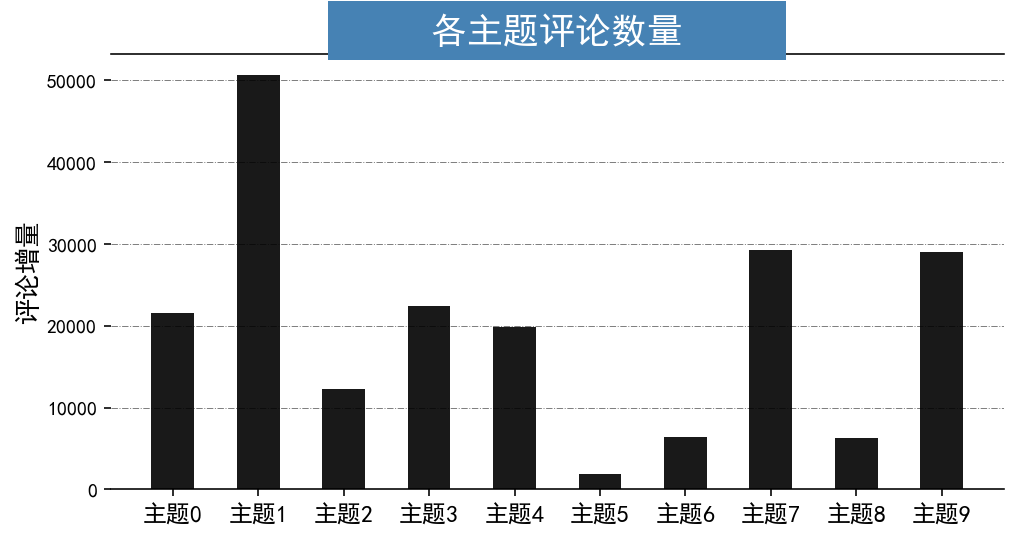

In [28]:
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体为黑体
# plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
# plt.style.use('ggplot')
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

ax.bar(
    range(n_topics),
    [list(topics).count(idx) for idx in range(n_topics)],color='#000000', alpha=0.9, width=0.5
)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
ax.yaxis.grid(lw=0.5, color='gray', linestyle='dashdot')
ax.set_axisbelow(True)
    # ax.xaxis.grid(linewidth=5, color='black')
# ax.plot([-0.5, 9], [50000, 50000], color='black', lw=2)

# ax.legend(loc=(1.02,0.65), edgecolor='black')
ax.set_ylabel('评论增量', fontsize=13)
ax.set_title('     各主题评论数量'+'     ',
             backgroundcolor='steelblue', fontsize=18, color='white', weight='bold')
ax.set_xticks(range(n_topics))
ax.set_xticklabels(['主题' + str(idx) for idx in range(n_topics)], fontsize=12)
# ax.spines['bottom'].set_visible(False)
plt.savefig('Topic_distribution.png', dpi=1080)
plt.show()

In [34]:
def print_top_words(model, feature_names, n_top_words):
    #打印每个主题下权重较高的term
    for topic_idx, topic in enumerate(lda.components_):
        print("主题 {}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()
    print()
    #打印主题-词语分布矩阵
#     print(model.components_.shape)

n_top_words = 40
tf_feature_names = countVectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


主题 0:
working experience great good lot work opportunity bank enjoyed learn company job learned learning career new really many environment people thing culture team industry schedule staff best worked loved grow also love knowledge banking advancement well icici one retail first

主题 1:
work job time get hour working people would manager like hard day good really pay one worked go make long store thing never shift week back worker much want could first lot got even love place know money paced fun

主题 2:
customer service sale call product client issue phone store account system daily order credit center also schedule department question support rn card cash assist equipment information data item provide report new current problem process server providing taking need sell relationship

主题 3:
de que la en empresa para el con se un los com trabajo ambiente una por muy et como trabalho muito mi em da uma lo era mais parte al um del na laboral le excelente dia trabalhar buen clientes

主题 4:


## TSNE降维可视化
**首先将LDA结果通过TSNE算法降维到2维进行可视化，随后我们发现2维中，有些主题未能被很好的划分，于是升维至3维进行可视化**

In [182]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components = 2,init = 'pca',random_state = 0, n_jobs = 12, n_iter=400)
output = tsne.fit_transform(lda_result)

In [166]:
select_idx = np.random.choice(range(output.shape[0]), 20000, replace=False)

<IPython.core.display.Javascript object>


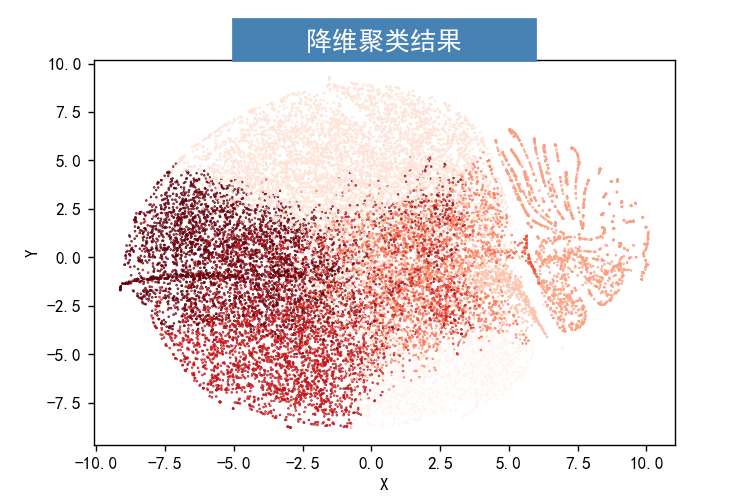

In [172]:
plt.figure(figsize=(6,4))
plt.scatter(output[select_idx,0],output[select_idx,1],c=topics[select_idx],
            s=0.2,
           cmap='Reds')
plt.title('     降维聚类结果'+'     ',
             backgroundcolor='steelblue', fontsize=15, color='white', weight='bold')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('t-SNE.png',bbox_inches = 'tight', dpi=600)
plt.show()

**上图可以看出在2维下，10个主题中，有少数几个主题较为重合**

**因此，我们选择升维度，在3维下再次观察主题分布情况，如下**

In [96]:
tsne_3d = TSNE(n_components = 3,
               init = 'pca',random_state = 0, n_jobs = 12, n_iter=400)
output_3d = tsne_3d.fit_transform(lda_result)

<IPython.core.display.Javascript object>


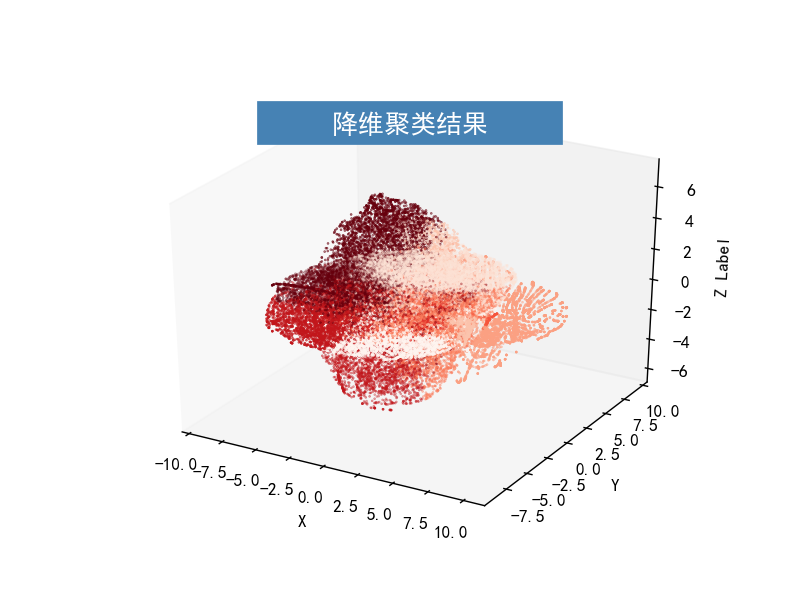

In [170]:
%matplotlib notebook     # 3d图可旋转坐标轴
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d'

ax.scatter(output_3d[select_idx,0],
           output_3d[select_idx,1],
           output_3d[select_idx,2],
           c=topics[select_idx],
           s=0.2,
           cmap='Reds'
          )
ax.grid(False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z Label')
plt.title('     降维聚类结果'+'     ',
             backgroundcolor='steelblue', fontsize=15, color='white', weight='bold')
plt.savefig('t-SNE-3d.png', bbox_inches = 'tight', dpi=600)
plt.show()

**上图可以看出，在3维下，主题分布已经被划分的较为明显**

In [173]:
# help(TSNE)

****
## 三、员工评论情感极性分析
****
**使用nltk.sentiment.vader中的SentimentIntensityAnalyzer做情感极性分析，
    sentiment score处于 [-1, 1]，接近0表示中性，越接近1表示情绪越积极，越接近-1表示情绪越积极**

In [178]:
sid = SentimentIntensityAnalyzer()
text_sentiment = []
for text in tqdm(data['text']):
    text_sentiment.append(sid.polarity_scores(text)['compound'])

cons_sentiment = []
for text in tqdm(data['cons']):
    if text != 'MISS':
        cons_sentiment.append(sid.polarity_scores(text)['compound'])
    
pros_sentiment = []
for text in tqdm(data['pros']):
    if text != 'MISS':
        pros_sentiment.append(sid.polarity_scores(text)['compound'])


100%|█████████████████████████████████████████████████████████████████████| 1030181/1030181 [00:30<00:00, 33242.11it/s]


In [195]:
# import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [206]:
def sentiment_distribution(sentiments):

    plt.figure(figsize=(8,4))
    plt.scatter(range(len(sentiments)), sentiments, s=0.1, label='各评论情感极性')
    plt.scatter(range(len(sentiments)), sorted(sentiments), 
                s=0.2, marker='*', label='排序后情感极性分布')
    # #99FFFF
    plt.ylim([-1, 1])
    plt.xlim([0, len(sentiments)])
    plt.ylabel('情感极性')
    plt.grid(False)
#     plt.axis(False)
    
    plt.legend(loc=(0.8, 1))
    plt.title('     员工评论情感极性分布      ', fontsize=18, color='white', weight='bold')
    plt.savefig('sentiment.png', dpi=1080)
    plt.show()

    return 0

<IPython.core.display.Javascript object>


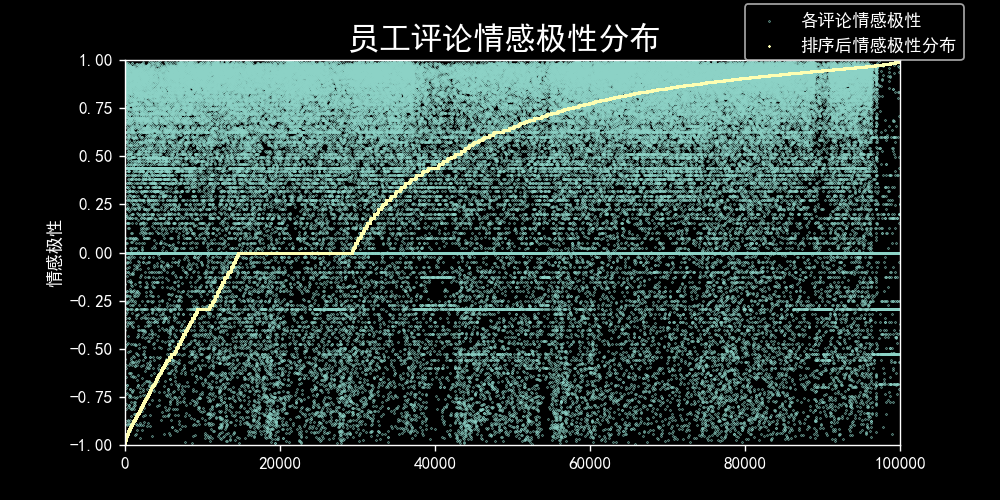

0

In [207]:
sentiment_distribution(text_sentiment[:100000])

**从上图可以看出**

**1、绝大部分员工评论是积极的，消极部分占少数，符合我们的描述性分析中，各级评分分布的特点，1、2级评分最少，4、5级评分很多**

**2、消极情绪的分布是均匀分布的（非常消极和一般消极的数量几乎相同）；而积极情绪中，积极程度大的评论更多（情感极性越积极的评论数量越多）**

**3、15%的员工评论是完全客观的，不带情感极性，我们认为这类评论是事实陈述**